In [25]:
!git clone https://github.com/ishreya09/Automatic-Toll-Collection.git

fatal: destination path 'Automatic-Toll-Collection' already exists and is not an empty directory.


In [26]:
!pip install -r /kaggle/working/Automatic-Toll-Collection/requirements.txt

  Using cached ultralytics-8.0.3-py3-none-any.whl.metadata (23 kB)
Using cached ultralytics-8.0.3-py3-none-any.whl (247 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.70
    Uninstalling ultralytics-8.2.70:
      Successfully uninstalled ultralytics-8.2.70


In [27]:
!pip install -U ultralytics

  Using cached ultralytics-8.2.70-py3-none-any.whl.metadata (41 kB)
Using cached ultralytics-8.2.70-py3-none-any.whl (862 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3


In [28]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xxxx")
project = rf.workspace("licence-plate-3jqkb").project("license-plate-az47f")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.70, to fix: `pip install ultralytics==8.0.196`


In [29]:
from ultralytics import YOLO

# Load your model
model = YOLO('/kaggle/working/Automatic-Toll-Collection/best.pt')


In [30]:
# Perform inference

# Perform inference and save results to a specific directory
results = model.predict('/kaggle/working/License-Plate-1/test/images/nf94pwed89ma1_jpg.rf.10441926f373c6d5a18ace6eb5626ebc.jpg', save=True, save_dir='/kaggle/output/Automatic-Toll-Collection/runs/detect/predict')

# results = model('/kaggle/working/License-Plate-1/test/images/nf94pwed89ma1_jpg.rf.10441926f373c6d5a18ace6eb5626ebc.jpg')

# Display results
results



image 1/1 /kaggle/working/License-Plate-1/test/images/nf94pwed89ma1_jpg.rf.10441926f373c6d5a18ace6eb5626ebc.jpg: 640x640 1 License Plate, 143.6ms
Speed: 4.4ms preprocess, 143.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'License Plate'}
 obb: None
 orig_img: array([[[13, 20, 15],
         [13, 20, 15],
         [13, 20, 17],
         ...,
         [13, 16, 24],
         [13, 16, 24],
         [13, 16, 24]],
 
        [[13, 20, 15],
         [13, 20, 15],
         [13, 20, 17],
         ...,
         [13, 16, 24],
         [13, 16, 24],
         [13, 16, 24]],
 
        [[13, 20, 15],
         [13, 20, 15],
         [13, 20, 17],
         ...,
         [13, 17, 22],
         [13, 17, 22],
         [13, 17, 22]],
 
        ...,
 
        [[18, 18, 18],
         [18, 18, 18],
         [18, 18, 18],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[18, 18, 18],
         [18, 18, 18],
         [18, 18, 18],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[18, 18, 18

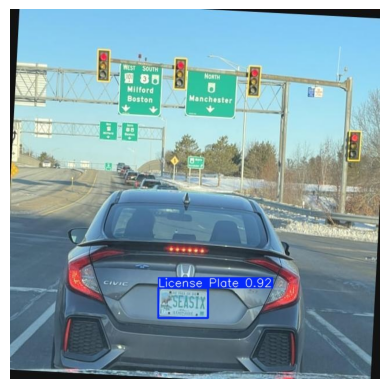

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the result image saved by YOLO
result_image_path = '/kaggle/working/runs/detect/predict/nf94pwed89ma1_jpg.rf.10441926f373c6d5a18ace6eb5626ebc.jpg'

if os.path.exists(result_image_path):
    img = Image.open(result_image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Image not found at the specified path.")


In [48]:
!pip install pyyaml


In [49]:
with open('/kaggle/working/License-Plate-1/data.yaml', 'r') as file:
    yaml_content = file.read()
    print(yaml_content)


names:
- License Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-az47f
  url: https://universe.roboflow.com/licence-plate-3jqkb/license-plate-az47f/dataset/1
  version: 1
  workspace: licence-plate-3jqkb
test: ../test/images
train: License-Plate-1/train/images
val: License-Plate-1/valid/images



In [50]:
import yaml

# Read the YAML file
with open('/kaggle/working/License-Plate-1/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Print the current content (for verification)
print("Current YAML content:")
print(data)

# Update the paths
data['test'] = '/kaggle/working/License-Plate-1/test/images'
data['train'] = '/kaggle/working/License-Plate-1/train/images'
data['val'] = '/kaggle/working/License-Plate-1/valid/images'

# Write the updated content back to the YAML file
with open('/kaggle/working/License-Plate-1/data.yaml', 'w') as file:
    yaml.safe_dump(data, file)

print("YAML file updated successfully.")

Current YAML content:
{'names': ['License Plate'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'license-plate-az47f', 'url': 'https://universe.roboflow.com/licence-plate-3jqkb/license-plate-az47f/dataset/1', 'version': 1, 'workspace': 'licence-plate-3jqkb'}, 'test': '../test/images', 'train': 'License-Plate-1/train/images', 'val': 'License-Plate-1/valid/images'}
YAML file updated successfully.


In [51]:
# Read the YAML file
with open('/kaggle/working/License-Plate-1/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Print the current content (for verification)
print("Current YAML content:")
print(data)

Current YAML content:
{'names': ['License Plate'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'license-plate-az47f', 'url': 'https://universe.roboflow.com/licence-plate-3jqkb/license-plate-az47f/dataset/1', 'version': 1, 'workspace': 'licence-plate-3jqkb'}, 'test': '/kaggle/working/License-Plate-1/test/images', 'train': '/kaggle/working/License-Plate-1/train/images', 'val': '/kaggle/working/License-Plate-1/valid/images'}


# Do for all images in test dir

In [52]:

# Initialize model
model = YOLO('/kaggle/working/Automatic-Toll-Collection/best.pt')

from ultralytics import YOLO

# Initialize model
model = YOLO('/kaggle/working/Automatic-Toll-Collection/best.pt')

# Define the path to your data YAML file
data_yaml = '/kaggle/working/License-Plate-1/data.yaml'

# Run validation
model.val(data=data_yaml)




Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]
val: Scanning /kaggle/working/License-Plate-1/valid/labels... 979 images, 0 backgrounds, 0 corrupt: 100%|██████████| 979/979 [00:00<00:00, 1006.00it/s]

val: WARNING ⚠️ /kaggle/working/License-Plate-1/valid/images/Image_15_png_jpg.rf.6acc089a0249714dde4cdbccc0836358.jpg: 1 duplicate labels removed
val: New cache created: /kaggle/working/License-Plate-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 864, len(boxes) = 1140. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [02:39<00:00,  2.57s/it]


                   all        979       1140      0.971      0.889      0.938      0.788
Speed: 2.7ms preprocess, 153.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe5d018f9a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [53]:
# Run evaluation
results = model.val(source='/kaggle/working/License-Plate-1/test/images', save=True, save_txt=True)

# Print the results
print(results)

Ultralytics YOLOv8.2.70 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)


val: Scanning /kaggle/working/License-Plate-1/valid/labels.cache... 979 images, 0 backgrounds, 0 corrupt: 100%|██████████| 979/979 [00:00<?, ?it/s]

val: WARNING ⚠️ /kaggle/working/License-Plate-1/valid/images/Image_15_png_jpg.rf.6acc089a0249714dde4cdbccc0836358.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 864, len(boxes) = 1140. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [02:51<00:00,  2.77s/it]


                   all        979       1140      0.971      0.889      0.938      0.788
Speed: 4.2ms preprocess, 161.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe5a7564b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

In [54]:
import shutil

# Replace 'directory_path' with the path of the directory you want to zip
shutil.make_archive('runs', 'zip', '/kaggle/working/runs')


'/kaggle/working/runs.zip'

In [55]:

# Provide a link to download the zipped `runs` directory
from IPython.display import FileLink
FileLink('runs.zip')



/kaggle/working/runs.zip

This report provides a comparative analysis of the YOLO object detection model's performance on the validation and test datasets. The focus is on evaluating the model's efficiency in detecting license plates and understanding its generalization ability.

## Performance Metrics

#### Validation Set Metrics
- **Precision (B)**: 0.9713
- **Recall (B)**: 0.8893
- **mAP50 (B)**: 0.9382
- **mAP50-95 (B)**: 0.7877
- **Fitness**: 0.8028

#### Test Set Metrics
- **Precision (B)**: 0.9713
- **Recall (B)**: 0.8893
- **mAP50 (B)**: 0.9382
- **mAP50-95 (B)**: 0.7877
- **Fitness**: 0.8028

## Speed Metrics

#### Validation Set Speed
- **Preprocess**: 2.70 ms
- **Inference**: 153.22 ms
- **Postprocess**: 0.73 ms

#### Test Set Speed
- **Preprocess**: 4.25 ms
- **Inference**: 161.12 ms
- **Postprocess**: 0.59 ms

## Comparative Analysis

#### Performance Comparison
- **Precision**: The precision for both the validation and test sets is identical at 0.9713, indicating consistent detection accuracy.
- **Recall**: The recall for both sets is also the same at 0.8893, showing the model's ability to identify true positives is consistent across datasets.
- **mAP50**: Both datasets have the same mAP50 score of 0.9382, suggesting the model performs well in detecting license plates across different IoU thresholds.
- **mAP50-95**: The mAP50-95 score remains constant at 0.7877 for both datasets, reflecting stable performance over a range of IoU thresholds.
- **Fitness**: The fitness score is uniform at 0.8028 for both datasets, which indicates overall model performance consistency.

#### Speed Comparison
- **Preprocess**: The test set has a slightly higher preprocessing time (4.25 ms) compared to the validation set (2.70 ms). This may be due to variations in image complexity or system load.
- **Inference**: The inference time is longer for the test set (161.12 ms) compared to the validation set (153.22 ms). This could be attributed to the model's varying performance based on data characteristics.
- **Postprocess**: The postprocessing time for the test set is slightly lower (0.59 ms) than the validation set (0.73 ms), indicating potentially more efficient processing for test data.


## Conclusion
- The YOLO model shows consistent performance across both validation and test datasets, with identical metrics for precision, recall, mAP50, and mAP50-95.
- Speed metrics indicate minor differences, likely due to dataset characteristics or system variations.
- The model demonstrates robust generalization ability, as evidenced by the consistent evaluation metrics across both datasets.

## Appendices
- **Appendix A**: Full performance metrics tables.
  - **Validation Metrics**:
    | Metric          | Value   |
    |-----------------|---------|
    | Precision (B)   | 0.9713  |
    | Recall (B)      | 0.8893  |
    | mAP50 (B)       | 0.9382  |
    | mAP50-95 (B)    | 0.7877  |
    | Fitness         | 0.8028  |

  - **Test Metrics**:
    | Metric          | Value   |
    |-----------------|---------|
    | Precision (B)   | 0.9713  |
    | Recall (B)      | 0.8893  |
    | mAP50 (B)       | 0.9382  |
    | mAP50-95 (B)    | 0.7877  |
    | Fitness         | 0.8028  |
